In [ ]:
## Make series of three hovmoller plots of binned frequency, intensity, and f*i

#PLOT 1: Climatology
#PLOT 2: Changes, 1980-2007 v 1951-1979
#PLOT 3: Changes, 1994-2007 v 1980-1993

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import time
import os
import netCDF4 as nc
import matplotlib.pyplot as plt
%matplotlib notebook
%load_ext autotime
from bootstrap import *
import numpy.ma as ma
from chr_matplotlib import remappedColorMap

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 8.99 ms


In [9]:
## CLIMATOLOGY PLOT ##

## LOAD FROM NETCDF ##
ferretdir = "/Users/Siwen/Desktop/Ferret/bin/"

#bounding years for climatology
yb=1951 
ye=2007

#load 57-year climatology
yb_last2= str(yb-1900)
print(yb_last2)
ye_last2= str("{0:0=2d}".format((ye-1900)%100))
print(ye_last2)

51
07
time: 3.41 ms


In [10]:
## LOAD FREQUENCY HOVMOLLER ##
loadfile = "RDA_hov_periods"
loadname = ferretdir + loadfile + '.nc'

#import from netCDF file
freq_climo_netcdf = nc.Dataset(loadname, "r")
freq_climo = freq_climo_netcdf['lat_hov_smth_' + yb_last2 + ye_last2][:]

#close it
freq_climo_netcdf.close()

time: 17.5 ms


In [11]:
## LOAD INTENSITY HOVMOLLER CLIMATOLOGY ##
loadfile = "RDA_int_climo"
loadname = ferretdir + loadfile + '.nc'

#import from netCDF file and load 57-year climatology
int_climo_netcdf = nc.Dataset(loadname, "r")
int_climo = int_climo_netcdf['int_mean_' + yb_last2 + ye_last2][:]

#close it
int_climo_netcdf.close()


time: 20.2 ms


In [12]:
## LOAD EFFECTIVE RAINFALL CLIMATOLOGY ##
loadfile = "RDA_effective_rainfall"
loadname = ferretdir + loadfile + '.nc'

#import from netCDF file and load 57-year climatology
rain_climo_netcdf = nc.Dataset(loadname, "r")
rain_climo = rain_climo_netcdf['rain_effective_' + yb_last2 + ye_last2][:]

#close it
rain_climo_netcdf.close()

time: 11.4 ms


<IPython.core.display.Javascript object>


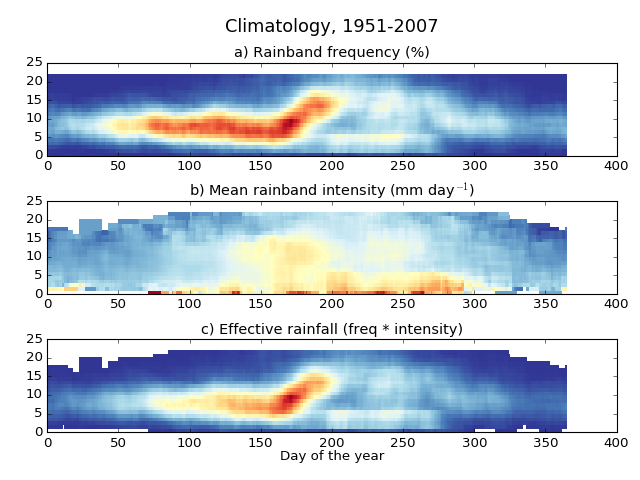

Overwriting existing version of file...
time: 4.49 s


In [13]:
## CLIMATOLOGY PLOT ##

fig, ax = plt.subplots()
ax.set_title("Climatology, 1951-2007", fontsize=16, y = 1.07)
mypalette = 'RdYlBu_r'
ax.set_axis_off()

ax1 = fig.add_subplot(3,1,1)
plot1 = ax1.pcolormesh(freq_climo.T, cmap = mypalette); 
ax1.set_title("a) Rainband frequency (%)", fontsize=13)
#cbar1 = fig.colorbar(plot1, cax = ax1)
#plt.xlabel('Day of the year', fontsize=12, labelpad=0)
#plt.ylabel('Latitude ($^\circ$)', fontsize=12, labelpad=0)
#plt.yticks(np.linspace(0,80,6),np.linspace(20,40,6).astype(int))

ax2 = fig.add_subplot(3,1,2)
plot2 = ax2.pcolormesh(int_climo.T, cmap = mypalette); 
ax2.set_title("b) Mean rainband intensity (mm day$^{-1}$)", fontsize=13)
#cbar2 = fig.colorbar(plot2, cax = ax2)
#plt.xlabel('Day of the year', fontsize=12, labelpad=0)
#plt.ylabel('Latitude ($^\circ$)', fontsize=12, labelpad=0)
#plt.yticks(np.linspace(0,80,6),np.linspace(20,40,6).astype(int))


ax3 = fig.add_subplot(3,1,3)
plot3 = ax3.pcolormesh(rain_climo.T, cmap = mypalette); 
ax3.set_title("c) Effective rainfall (freq * intensity)", fontsize=13)
plt.xlabel('Day of the year', fontsize=12, labelpad=0)
#cbar3 = fig.colorbar(plot3, cax = ax3)
#plt.ylabel('Latitude ($^\circ$)', fontsize=12, labelpad=0)
#plt.yticks(np.linspace(0,80,6),np.linspace(20,40,6).astype(int))

plt.tight_layout(pad=0, w_pad=0, h_pad=.5)

savepath = "/Users/Siwen/RDA/hov_freq_int_climo.pdf"

if os.path.exists(savepath):
    print("Overwriting existing version of file...")
    os.remove(savepath)


plt.savefig(savepath)

In [8]:
## LOAD 1980-2007 v 1951-1979 changes FROM NETCF ##

## NETCDF FILENAMES
freq_diff_file = "RDA_freq_diff_tau_seasonal"
freq_diff_name = ferretdir + freq_diff_file + '.nc'

int_diff_file = "RDA_int_diff"
int_diff_name = ferretdir + int_diff_file + '.nc'

int_pval_file = "RDA_int_diff_bootstrap_2000iter"
int_pval_name = ferretdir + int_pval_file + '.nc'

rain_diff_file = "RDA_effective_rainfall_diff"
rain_diff_name = ferretdir + rain_diff_file + '.nc'

#import from netCDF file and load 57-year climatology
freq_diff_netcdf = nc.Dataset(freq_diff_name, "r")
int_diff_netcdf = nc.Dataset(int_diff_name, "r")
int_pval_netcdf = nc.Dataset(int_pval_name, "r")
rain_diff_netcdf = nc.Dataset(rain_diff_name, "r")

#limits of different time periods that we're comparing
p1_beg = [1951,1980]
p1_end = [1979,1993]
p2_beg = [1980,1994]
p2_end = [2007,2007]

#in this case, we're just going to load the smoothed plots of hovmoller frequency
freq_diff = []
freq_pval = []
int_diff = []
int_pval = []
rain_diff = []

for p1_b, p1_e, p2_b, p2_e in zip(p1_beg, p1_end, p2_beg, p2_end):

    years_p1= str(p1_b-1900) + str("{0:0=2d}".format((p1_e-1900)%100))
    print(years_p1)
    years_p2= str(p2_b-1900) + str("{0:0=2d}".format((p2_e-1900)%100))
    print(years_p2)
    
    freq_diff.append(freq_diff_netcdf['lat_diff_tau_' + years_p2 + '_' + years_p1][:])
    freq_pval.append(freq_diff_netcdf['lat_pval_tau_' + years_p2 + '_' + years_p1][:])
    int_diff.append(int_diff_netcdf['int_diff_' + years_p2 + '_' + years_p1][:])
    int_pval.append(int_pval_netcdf['int_pval_' + years_p2 + '_' + years_p1][:])
    rain_diff.append(rain_diff_netcdf['rain_effective_diff_' + years_p2 + '_' + years_p1][:])
    
#close it
freq_diff_netcdf.close()
int_diff_netcdf.close()
int_pval_netcdf.close()
rain_diff_netcdf.close()

5179
8007
8093
9407
time: 69.6 ms


In [14]:
## CREATE FIGURE OF 1980-2007 v 1951-1979 changes

fig, ax = plt.subplots()
ax.set_title("1980-2007 versus 1951-1979", fontsize=16, y = 1.07)
mypalette = 'bwr_r'

ax1 = fig.add_subplot(3,1,1)
plot1 = ax1.pcolormesh(100*freq_diff[0].T, cmap = mypalette, vmin = -3, vmax = 3); 
#plt.contour(mk_total[1][1].T,1,colors = 'gray')
ax1.set_title("a) Change in Band Frequency (%))", fontsize=13)
plt.ylabel('Latitude ($^\circ$)', fontsize=12, labelpad=0)

ax2 = fig.add_subplot(3,1,2)
plot2 = ax2.pcolormesh(int_diff[0].T, cmap = mypalette, vmin = -5, vmax = 5); 
#plt.contour(mk_band[1][1].T,1,colors = 'gray')
ax2.set_title("b) Change in Band Intensity (mm day$^{-1}$)", fontsize=13)
plt.ylabel('Latitude ($^\circ$)', fontsize=12, labelpad=0)

ax3 = fig.add_subplot(3,1,3)
plot3 = ax3.pcolormesh(rain_diff[0].T, cmap = mypalette, vmin = -1, vmax = 1); 
#plt.contour(mk_local[1][1].T,1,colors = 'gray')
ax3.set_title("c) Change in Band Rainfall (freq*intensity)", fontsize=13)
plt.xlabel('Day of the year', fontsize=12, labelpad=0)
plt.ylabel('Latitude ($^\circ$)', fontsize=12, labelpad=0)

plt.tight_layout(pad=0, w_pad=0, h_pad=.5)
ax.set_axis_off()

#fig.subplots_adjust(right=0.8)

savepath = "/Users/Siwen/RDA/hov_freq_int_8007_5179.pdf"

if os.path.exists(savepath):
    print("Overwriting existing version of file...")
    os.remove(savepath)


plt.savefig(savepath)

<IPython.core.display.Javascript object>

NameError: name 'freq_diff' is not defined

time: 104 ms


<IPython.core.display.Javascript object>


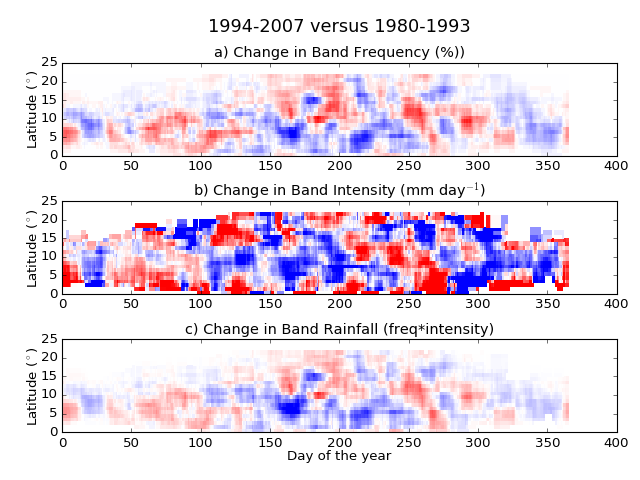

Overwriting existing version of file...
time: 4.3 s


In [42]:
## CREATE FIGURE OF 1994-2007 versus 1980-1993 changes

fig, ax = plt.subplots()
ax.set_title("1994-2007 versus 1980-1993", fontsize=16, y = 1.07)
mypalette = 'bwr_r'

ax1 = fig.add_subplot(3,1,1)
plot1 = ax1.pcolormesh(100*freq_diff[1].T, cmap = mypalette, vmin = -3, vmax = 3); 
#plt.contour(mk_total[1][1].T,1,colors = 'gray')
ax1.set_title("a) Change in Band Frequency (%))", fontsize=13)
plt.ylabel('Latitude ($^\circ$)', fontsize=12, labelpad=0)

ax2 = fig.add_subplot(3,1,2)
plot2 = ax2.pcolormesh(int_diff[1].T, cmap = mypalette, vmin = -5, vmax = 5); 
#plt.contour(mk_band[1][1].T,1,colors = 'gray')
ax2.set_title("b) Change in Band Intensity (mm day$^{-1}$)", fontsize=13)
plt.ylabel('Latitude ($^\circ$)', fontsize=12, labelpad=0)

ax3 = fig.add_subplot(3,1,3)
plot3 = ax3.pcolormesh(rain_diff[1].T, cmap = mypalette, vmin = -1, vmax = 1); 
#plt.contour(mk_local[1][1].T,1,colors = 'gray')
ax3.set_title("c) Change in Band Rainfall (freq*intensity)", fontsize=13)
plt.xlabel('Day of the year', fontsize=12, labelpad=0)
plt.ylabel('Latitude ($^\circ$)', fontsize=12, labelpad=0)

plt.tight_layout(pad=0, w_pad=0, h_pad=.5)
ax.set_axis_off()

#fig.subplots_adjust(right=0.8)

savepath = "/Users/Siwen/RDA/hov_freq_int_9407_8093.pdf"

if os.path.exists(savepath):
    print("Overwriting existing version of file...")
    os.remove(savepath)


plt.savefig(savepath)

In [15]:
## USE P-VALS TO CREATE MASKS APPLIED TO ONLY SHOW SIGNIFICANT DIFFERENCES
## 1980-2007 versus 1951-1979 - clearly cuts out a lot of random noise!

freq_diff_mask_95 = []
freq_diff_mask_99 = []

for fq, pval in zip(freq_diff, freq_pval):
    freq_diff_mask_95.append(ma.array(fq, mask = ~(abs(pval-.5) > .475)))
    freq_diff_mask_99.append(ma.array(fq, mask = ~(abs(pval-.5) > .495)))

int_diff_mask_95 = []
int_diff_mask_99 = []   
    
for ints, pval in zip(int_diff, int_pval):
    int_diff_mask_95.append(ma.array(ints, mask = ~(abs(pval-.5) > .475)))
    int_diff_mask_99.append(ma.array(ints, mask = ~(abs(pval-.5) > .495)))


#rain_diff_mask = []

NameError: name 'freq_diff' is not defined

time: 11.3 ms


In [16]:
## CREATE FIGURE OF 1980-2007 v 1951-1979 changes

fig, ax = plt.subplots()
ax.set_title("1980-2007 versus 1951-1979", fontsize=16, y = 1.07)
mypalette = 'bwr'

ax1 = fig.add_subplot(3,1,1)
plot1 = ax1.pcolormesh(100*freq_diff_mask_95[0].T, cmap = mypalette, vmin = -3, vmax = 3); 
plt.contour(freq_diff_mask_99[0].mask.T,1,colors = 'gray')
ax1.set_title("a) Change in Band Frequency (%))", fontsize=13)
plt.ylabel('Latitude ($^\circ$)', fontsize=12, labelpad=0)

ax2 = fig.add_subplot(3,1,2)
plot2 = ax2.pcolormesh(int_diff_mask_95[0].T, cmap = mypalette, vmin = -5, vmax = 5); 
plt.contour(int_diff_mask_99[0].mask.T,1,colors = 'gray')
ax2.set_title("b) Change in Band Intensity (mm day$^{-1}$)", fontsize=13)
plt.ylabel('Latitude ($^\circ$)', fontsize=12, labelpad=0)

ax3 = fig.add_subplot(3,1,3)
plot3 = ax3.pcolormesh(rain_diff[0].T, cmap = mypalette, vmin = -1, vmax = 1); 
#plt.contour(mk_local[1][1].T,1,colors = 'gray')
ax3.set_title("c) Change in Band Rainfall (freq*intensity)", fontsize=13)
plt.xlabel('Day of the year', fontsize=12, labelpad=0)
plt.ylabel('Latitude ($^\circ$)', fontsize=12, labelpad=0)

plt.tight_layout(pad=0, w_pad=0, h_pad=.5)
ax.set_axis_off()

#fig.subplots_adjust(right=0.8)

savepath = "/Users/Siwen/RDA/hov_freq_int_8007_5179_mask.pdf"

if os.path.exists(savepath):
    print("Overwriting existing version of file...")
    os.remove(savepath)


plt.savefig(savepath)

<IPython.core.display.Javascript object>

IndexError: list index out of range

time: 104 ms


<IPython.core.display.Javascript object>


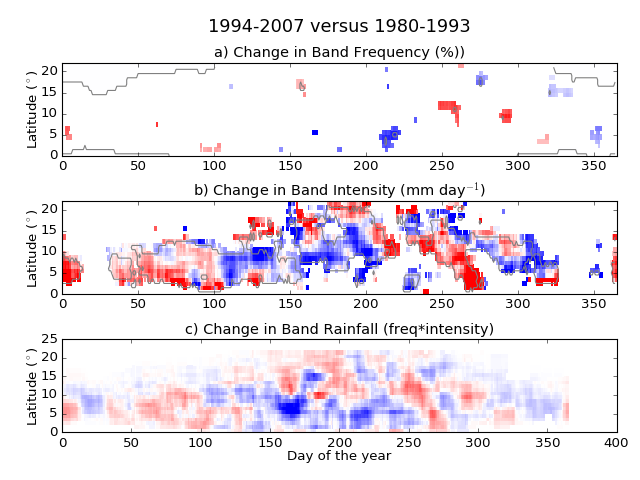

Overwriting existing version of file...
time: 4 s


In [19]:
## CREATE FIGURE OF 1994-2007 versus 1980-1993 changes

fig, ax = plt.subplots()
ax.set_title("1994-2007 versus 1980-1993", fontsize=16, y = 1.07)
mypalette = 'bwr_r'

ax1 = fig.add_subplot(3,1,1)
plot1 = ax1.pcolormesh(100*freq_diff_mask_95[1].T, cmap = mypalette, vmin = -3, vmax = 3); 
plt.contour(freq_diff_mask_99[1].mask.T,1,colors = 'gray')
ax1.set_title("a) Change in Band Frequency (%))", fontsize=13)
plt.ylabel('Latitude ($^\circ$)', fontsize=12, labelpad=0)

ax2 = fig.add_subplot(3,1,2)
plot2 = ax2.pcolormesh(int_diff_mask_95[1].T, cmap = mypalette, vmin = -5, vmax = 5); 
plt.contour(int_diff_mask_99[1].mask.T,1,colors = 'gray')
ax2.set_title("b) Change in Band Intensity (mm day$^{-1}$)", fontsize=13)
plt.ylabel('Latitude ($^\circ$)', fontsize=12, labelpad=0)

ax3 = fig.add_subplot(3,1,3)
plot3 = ax3.pcolormesh(rain_diff[1].T, cmap = mypalette, vmin = -1, vmax = 1); 
#plt.contour(mk_local[1][1].T,1,colors = 'gray')
ax3.set_title("c) Change in Band Rainfall (freq*intensity)", fontsize=13)
plt.xlabel('Day of the year', fontsize=12, labelpad=0)
plt.ylabel('Latitude ($^\circ$)', fontsize=12, labelpad=0)

plt.tight_layout(pad=0, w_pad=0, h_pad=.5)
ax.set_axis_off()

#fig.subplots_adjust(right=0.8)

savepath = "/Users/Siwen/RDA/hov_freq_int_9407_8093.pdf"

if os.path.exists(savepath):
    print("Overwriting existing version of file...")
    os.remove(savepath)


plt.savefig(savepath)